<a href="https://colab.research.google.com/github/monirsk/TensorFlow_Thesis/blob/main/tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Image classification

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import matplotlib.pyplot as plt
import random

In [5]:
X_train = np.loadtxt("input.csv", delimiter = ",")
Y_train = np.loadtxt("labels.csv", delimiter = ",")

X_test = np.loadtxt( "input_test.csv", delimiter = ",")
Y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [10]:
X_train  = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape )

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


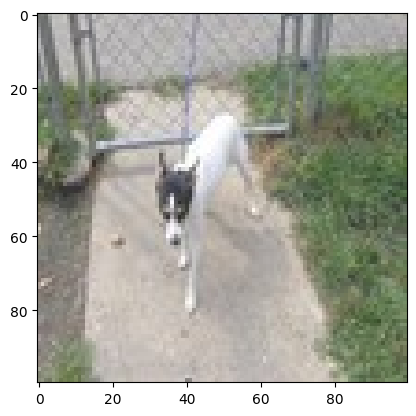

In [15]:
# Showing the images from the train dataset

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


# Model

In [16]:
model = Sequential(
    [
        Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 100, 3)),
        MaxPooling2D((2,2)),

        Conv2D(32, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),

        Flatten(),

        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')


    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Another way to define the Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
# Compiling

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs =5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 782ms/step - accuracy: 0.6944 - loss: 0.5832
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 779ms/step - accuracy: 0.7498 - loss: 0.5250
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 791ms/step - accuracy: 0.7723 - loss: 0.4746
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 813ms/step - accuracy: 0.8271 - loss: 0.4087
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 860ms/step - accuracy: 0.8325 - loss: 0.3879


In [21]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6658 - loss: 0.6349


[0.5798180103302002, 0.699999988079071]

# Making prediction for individual dataset

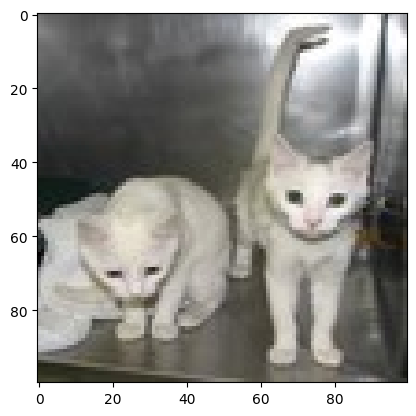

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Our model predicts that the image is of:  Cat Percernt:  [[0.51847273]]


In [36]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

predic_perct =  y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    prediction = "Dog"
else:
    prediction = "Cat"

print("Our model predicts that the image is of: ", prediction, "Percernt: ", predic_perct)